#  Метрические алгоритмы классификации
##  Импортируем основные импорты

In [54]:
from sklearn import datasets
from sklearn.neighbors import  KNeighborsClassifier
import numpy
import pandas
import pylab
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut

## Будем работать с датасетом ирисы фишера.

In [55]:
df = datasets.load_iris()
X = df.data[:,2:4]
Y = df.target


In [56]:
scores = numpy.zeros(148)
loo = LeaveOneOut()
for train, test in loo.split(X):
    for i in range(1,149):
        prediction = KNeighborsClassifier(n_neighbors=i).fit(X[train],Y[train]).predict(X[test])
        scores[i-1] += 1 if prediction != Y[test] else 0


minimum = numpy.amin(scores)
index = numpy.where(scores == minimum)[0]+1

best_score = 100-minimum/len(X)
best_score

99.96666666666667

## С помощью loo подобрали оптимальный k
## точность алгоритма составляет 99.96666666666667

Text(0, 0.5, 'count of errors')

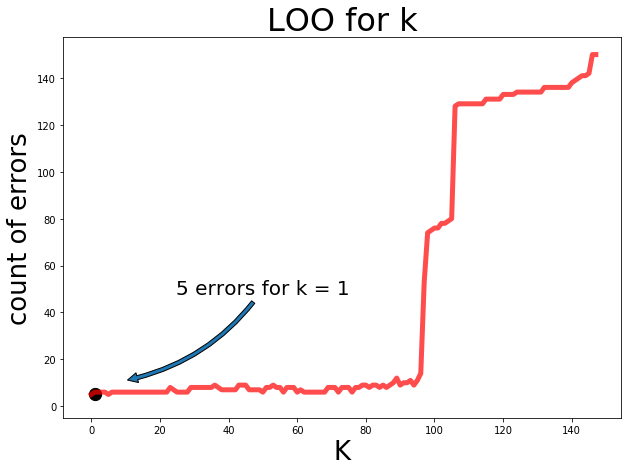

In [57]:

plt.plot(scores,c='red',alpha=0.7,linewidth = 5)
txt = '{} errors for k = {}'.format(int(min(scores)),index[0])

plt.scatter(index[0],min(scores),c='black',s=150)
plt.annotate(txt,
            xy=(min(scores+5), index[0]+10), xycoords='data',
            xytext=(50, 50), textcoords='data',
            size=20, va="center", ha="center",
            arrowprops=dict(arrowstyle="simple",
                                   connectionstyle="arc3,rad=-0.2"),
            )
plt.title('LOO for k', fontsize = 32)
plt.xlabel('K', fontsize = 26)
plt.ylabel('count of errors',fontsize = 26)

## Обучаем алгоритм на данных датасета

In [58]:
KNN = KNeighborsClassifier(n_neighbors=index[0])
KNN.fit(X[:,0:2],Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

## Строим карту классификации

Text(0, 0.5, 'Length')

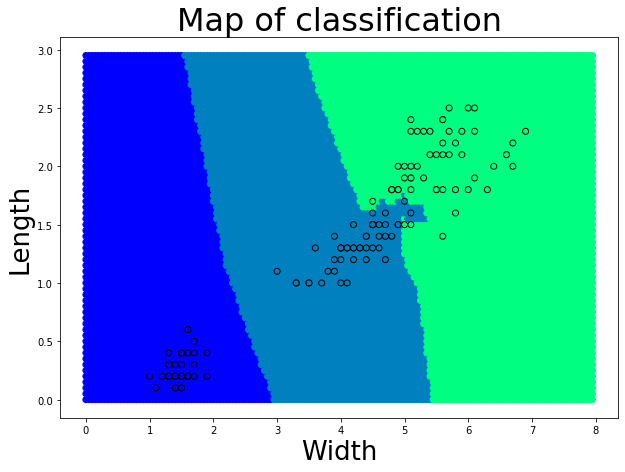

In [59]:
new_points = []
for i in numpy.arange(0,8,0.05):
    for j in numpy.arange(0,3,0.05):
        new_points.append([i,j])
predicted_labels = KNN.predict(new_points)
df_predicted_labels = pandas.DataFrame(data=new_points)
plt.rcParams["figure.figsize"] = [10,7]
plt.scatter(df_predicted_labels[:][0],df_predicted_labels[:][1],c=predicted_labels,cmap=pylab.cm.winter)
plt.scatter(X[:,0],X[:,1],c=Y,cmap=pylab.cm.winter,edgecolor='black')
plt.title('Map of classification', fontsize = 32)
plt.xlabel('Width', fontsize = 26)
plt.ylabel('Length',fontsize = 26)


